In [1]:
import tensorflow as tf
import numpy as np

### Working with Multiple layers

In [6]:
# first create the image
batch_size = [1]
img_size   = [4,4,1]
data       = tf.random.uniform(shape = batch_size + img_size)

In [16]:
# creating the moving layers
def moving_layer(x):
#     myFilter = tf.constant(0.25, shape = (2,2,1,1))
    myFilter = tf.constant([[[[0.25]],[[0.25]]],[[[0.25]],[[0.25]]]])
    myStrides= [1,2,2,1]
    z = tf.nn.conv2d(x, myFilter, myStrides, padding = 'SAME', name = 'moving_layer')
    return z

In [17]:
# creating the second neuron layer i.e. weighted summation + activation
def second_layer(x):
    '''The input is 4 dimensional and should be squeezed to 2 dimensions'''
    x = tf.squeeze(x)
    A = tf.constant([[1,2],[-1, 4]], dtype = tf.float32)
    b = tf.constant(1., shape = (2,2))
    z = tf.add(tf.matmul(A,x), b)
    return tf.nn.sigmoid(z)

In [18]:
first_layer_tensor = moving_layer(data)
second_layer_tensor= second_layer(first_layer_tensor)
print(second_layer_tensor.numpy())

[[0.93297553 0.9044909 ]
 [0.9147111  0.937245  ]]


### Backpropagation

In [35]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [36]:
np.random.seed(0)
xvals = np.random.normal(1, 0.1, 100).astype(np.float32)
yvals = (xvals * np.random.normal(1, 0.05, 100)-0.5).astype('float32')

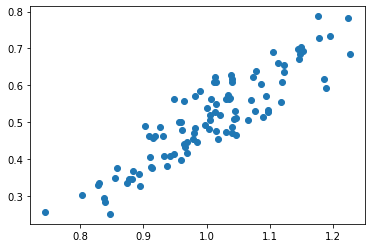

In [37]:
plt.scatter(xvals, yvals)
plt.show()

In [56]:
def my_output(x, weights, biases):
    return tf.add(tf.multiply(x, weights), biases)

In [57]:
def L2_loss_func(ytrue, ypred):
    return tf.reduce_mean(tf.square(ypred - ytrue))

In [62]:
my_opt = tf.optimizers.SGD(learning_rate = 0.02)

In [63]:
tf.random.set_seed(1)
np.random.seed(0)
weights = tf.Variable(tf.random.normal(shape = [1]))
biases  = tf.Variable(tf.random.normal(shape = [1]))
history = []

In [66]:
for i in range(100):
    rand_index = np.random.choice(100)
    rand_x = [xvals[rand_index]]
    rand_y = [yvals[rand_index]]
    
    with tf.GradientTape() as tape:
        predictions = my_output(rand_x, weights, biases)
        loss = L2_loss_func(rand_y, predictions)
    history.append(loss.numpy())
    gradients = tape.gradient(loss, [weights, biases])
    my_opt.apply_gradients(zip(gradients, [weights, biases]))
    if(i+1)%25 == 0:
        print(f'Step:{i+1} Weights:{weights.numpy()} Biases:{biases.numpy()}')
        print(f'Loss : {loss.numpy()}')
    

Step:25 Weights:[-0.43744692] Biases:[0.980521]
Loss : 0.00911057461053133
Step:50 Weights:[-0.41757247] Biases:[0.98669845]
Loss : 0.0066385092213749886
Step:75 Weights:[-0.42524943] Biases:[0.95881224]
Loss : 0.10905004292726517
Step:100 Weights:[-0.4293466] Biases:[0.9367944]
Loss : 0.034686408936977386


In [67]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
    y = x**2
    gradients_dydx = tape.gradient(y, x)

In [68]:
print(gradients_dydx.numpy())

6.0


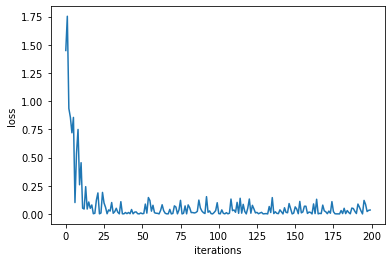

In [70]:
plt.plot(history)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

In [77]:
a = np.concatenate((np.random.normal(3,1,50),np.random.normal(-3,1,50)))

In [87]:
a = np.array([1,2,3,4,5])
b = np.array([6,7,8,9,0])
c = np.concatenate(tuple((a,b)))

In [88]:
c

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 0])

In [89]:
print(a,b)

[1 2 3 4 5] [6 7 8 9 0]


In [90]:
# practicing concatenation
a = np.array([[1,2],[3,4]])
b = np.array([5,6])

In [93]:
print(np.concatenate((a, np.reshape(b, (2,1))), axis  = 1))

[[1 2 5]
 [3 4 6]]


In [96]:
print(np.concatenate((a, np.reshape(b, (1,2))), axis = 0))

[[1 2]
 [3 4]
 [5 6]]
